In [1]:
# Import the modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
% matplotlib inline

In [2]:
filename = 'Folds5x2_pp.xlsx'
df = pd.read_excel(filename, sheet_name='Sheet1')
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [3]:
X, Y = df[['AT', 'V','AP','RH']], df['PE']
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
target_scaler = MinMaxScaler()
Y_new = target_scaler.fit_transform(Y.values.reshape(-1,1))
X_train, X_test, Y_train, y_test = \
  train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

In [4]:
class LinearRegressor:
    def __init__(self,d, lr=0.001 ):
                
        # Place holders for input-output training data
        self.X = tf.placeholder(tf.float32,\
                    shape=[None,d], name='input')
        self.Y = tf.placeholder(tf.float32,\
                    name='output')
        # Variables for weight and bias
        self.b = tf.Variable(0.0, dtype=tf.float32)
        self.W = tf.Variable(tf.random_normal([d,1]),\
                             dtype=tf.float32)
            
        # The Linear Regression Model
        self.F = self.function(self.X)
        
        # Loss function
        self.loss = tf.reduce_mean(tf.square(self.Y - self.F,\
                                        name='LSE'))

        # Gradient Descent with learning 
        # rate of 0.05 to minimize loss
        optimizer = tf.train.GradientDescentOptimizer(lr)
        self.optimize = optimizer.minimize(self.loss)

        # Initializing Variables
        init_op = tf.global_variables_initializer()
        self.sess = tf.Session()
        self.sess.run(init_op)
        
    def function(self, X):
        return tf.matmul(X, self.W) + self.b
 
    def fit(self, X, Y,epochs=500):
        total = []
        for i in range(epochs):
            _, l = self.sess.run([self.optimize,self.loss],\
                            feed_dict={self.X: X, self.Y: Y})
            total.append(l)
            if i%100==0:
                print('Epoch {0}/{1}: Loss {2}'.format(i,epochs,l))
        return total
    
    def predict(self, X):
        return self.sess.run(self.function(X), feed_dict={self.X:X})
    
    def get_weights(self):
        return self.sess.run([self.W, self.b])

In [5]:
N, d = X_train.shape
model = LinearRegressor(d)
#loss = model.fit(X_train, Y_train)

In [6]:
loss = model.fit(X_train, Y_train, 20000)

Epoch 0/20000: Loss 0.21545326709747314
Epoch 100/20000: Loss 0.19007785618305206
Epoch 200/20000: Loss 0.17610767483711243
Epoch 300/20000: Loss 0.16699175536632538
Epoch 400/20000: Loss 0.16001276671886444
Epoch 500/20000: Loss 0.15404105186462402
Epoch 600/20000: Loss 0.1486041396856308
Epoch 700/20000: Loss 0.14350160956382751
Epoch 800/20000: Loss 0.13864654302597046
Epoch 900/20000: Loss 0.13399846851825714
Epoch 1000/20000: Loss 0.12953655421733856
Epoch 1100/20000: Loss 0.12524846196174622
Epoch 1200/20000: Loss 0.12112526595592499
Epoch 1300/20000: Loss 0.11715959757566452
Epoch 1400/20000: Loss 0.11334507167339325
Epoch 1500/20000: Loss 0.10967571288347244
Epoch 1600/20000: Loss 0.10614560544490814
Epoch 1700/20000: Loss 0.10274960100650787
Epoch 1800/20000: Loss 0.09948232769966125
Epoch 1900/20000: Loss 0.0963388979434967
Epoch 2000/20000: Loss 0.0933145210146904
Epoch 2100/20000: Loss 0.09040451794862747
Epoch 2200/20000: Loss 0.0876045748591423
Epoch 2300/20000: Loss 0.08

Epoch 18900/20000: Loss 0.011563439853489399
Epoch 19000/20000: Loss 0.011530875228345394
Epoch 19100/20000: Loss 0.011498632840812206
Epoch 19200/20000: Loss 0.011466740630567074
Epoch 19300/20000: Loss 0.011435122229158878
Epoch 19400/20000: Loss 0.011403791606426239
Epoch 19500/20000: Loss 0.011372771114110947
Epoch 19600/20000: Loss 0.011342059820890427
Epoch 19700/20000: Loss 0.011311582289636135
Epoch 19800/20000: Loss 0.01128139067441225
Epoch 19900/20000: Loss 0.011251499876379967


Text(0,0.5,'Mean Square Error')

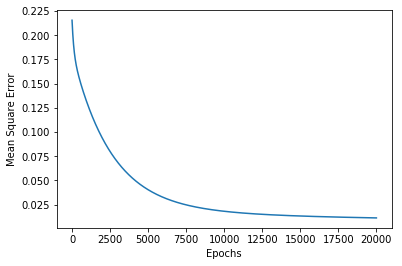

In [7]:
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")

In [8]:
Y_pred = model.predict(np.float32(X_test))

In [9]:
print("R2 Score is {} and MSE {}".format(\
       r2_score(y_test, Y_pred),\
       mean_squared_error(y_test, Y_pred)))

R2 Score is 0.7688640977806545 and MSE 0.011896210533449397


Text(0,0.5,'Predicted Net Hourly Electrical Energy Output (MW)')

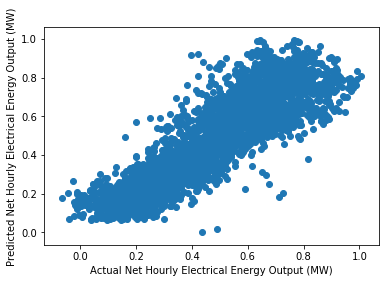

In [10]:
plt.scatter(Y_pred, y_test)
#plt.plot(X_test, Y_pred)
plt.xlabel("Actual Net Hourly Electrical Energy Output (MW)")
plt.ylabel("Predicted Net Hourly Electrical Energy Output (MW)")

In [11]:
print("The weights and biase are", model.get_weights())

The weights and biase are [array([[-0.34623718],
       [-0.31071773],
       [ 0.73499143],
       [ 0.06738219]], dtype=float32), 0.37082589]
